In [1]:
import pandas as pd

df = pd.read_csv('../../data/SONIX utilities - Road.csv')
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Heel lab Heel brand,Forefoot lab Forefoot brand,Widths available,Orthotic friendly,Season,Removable insole,Ranking,Popularity,Gender,Terrain
0,Brooks,Launch 9,87\n Great!,$110,Daily runningTempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,HeelMid/forefoot,...,32.4 mm 36.0 mm,23.0 mm 26.0 mm,NormalWide,1,-,1,#301 Top 47%,#352 Bottom 45%,NaN,NaN
1,Brooks,Levitate 6,90\n Superb!,$150,Daily running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/forefoot,...,34.3 mm 32.5 mm,26.6 mm 24.5 mm,Normal,1,SummerAll seasons,1,#72 Top 20%,#255 Bottom 30%,NaN,NaN
2,Adidas,4DFWD,90\n Superb!,$200,Daily running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,HeelMid/forefoot,...,33.3 mm 32.5 mm,24.4 mm 22.5 mm,Normal,1,All seasons,1,#104 Top 17%,#368 Bottom 42%,NaN,NaN
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,31.8 mm 32.0 mm,21.2 mm 21.0 mm,Normal,1,All seasons,1,#126 Top 20%,#541 Bottom 16%,NaN,NaN
4,Adidas,4DFWD 3,88\n Great!,$200,Daily running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,HeelMid/forefoot,...,32.6 mm 34.0 mm,22.7 mm 24.0 mm,Normal,1,All seasons,1,#116 Top 32%,#339 Bottom 7%,NaN,NaN


value "✗" sama "✓" udah diubah ke 0 1 manual di sheet

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Brand                        1170 non-null   str  
 1   Name                         1170 non-null   str  
 2   Audience score               1164 non-null   str  
 3   Price                        1170 non-null   str  
 4   Pace                         1170 non-null   str  
 5   Arch support                 1170 non-null   str  
 6   Weight lab Weight brand      1170 non-null   str  
 7   Lightweight                  1170 non-null   int64
 8   Drop lab Drop brand          1170 non-null   str  
 9   Strike pattern               1170 non-null   str  
 10  Size                         1170 non-null   str  
 11  Midsole softness             1170 non-null   str  
 12  Toebox durability            1170 non-null   str  
 13  Heel padding durability      1170 non-null   str  
 14  Out

In [3]:
observed_col = [
    'Brand',
    'Pace',
    'Arch support',
    'Lightweight',
    'Strike pattern',
    'Size',
    'Midsole softness',
    'Toebox durability',
    'Heel padding durability',
    'Outsole durability',
    'Breathability',
    'Width / fit',
    'Toebox width',
    'Stiffness',
    'Torsional rigidity',
    'Heel counter stiffness',
    'Plate',
    'Rocker',
    'Widths available',
    'Orthotic friendly',
    'Season',
    'Removable insole'
]

for col in observed_col:    
    uniques = df[col].dropna().unique()
    print(f"\n{col} ({len(uniques)} unique)")
    print(uniques)


Brand (32 unique)
<StringArray>
[      'Brooks',       'Adidas',     'Skechers',      'Salomon',
         'Nike',       'NOBULL',         'Hoka',         'HOKA',
         'Topo',      'Diadora',      'Saucony', 'Under Armour',
           'On',           'on',          'On ',         'PUMA',
         'Puma',         'NIke',        'ASICS',        'Altra',
       'Reebok',  'New Balance',  'new Balance',       'Mizuno',
        'Nike ',       'Jordan',        'Inov8',      'SAlomon',
         'Xero',          'APL',     'Allbirds',      'Merrell']
Length: 32, dtype: str

Pace (5 unique)
<StringArray>
['Daily runningTempo',      'Daily running',              'Tempo',
   'CompetitionTempo',        'Competition']
Length: 5, dtype: str

Arch support (3 unique)
<StringArray>
['Neutral', 'Motion control', 'Stability']
Length: 3, dtype: str

Lightweight (2 unique)
[1 0]

Strike pattern (5 unique)
<StringArray>
['HeelMid/forefoot', 'Mid/forefoot', 'Heel', '-', 'Heel Mid/forefoot']
Length: 5, dt

In [4]:
# check row dari filter masih kemasukan apa ngga
df[df["Pace"]== "Select"]

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Heel lab Heel brand,Forefoot lab Forefoot brand,Widths available,Orthotic friendly,Season,Removable insole,Ranking,Popularity,Gender,Terrain


# Cleaning Brand

In [6]:
df["Brand"] = (
    df["Brand"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

brand_uniques = df["Brand"].dropna().unique()
# brand_uniques.sort()
brand_uniques = sorted(brand_uniques)
print(f"Brand ({len(brand_uniques)} uniques): \n",brand_uniques)

df["Brand"].value_counts().head(25)

Brand (24 uniques): 
 ['Adidas', 'Allbirds', 'Altra', 'Apl', 'Asics', 'Brooks', 'Diadora', 'Hoka', 'Inov8', 'Jordan', 'Merrell', 'Mizuno', 'New Balance', 'Nike', 'Nobull', 'On', 'Puma', 'Reebok', 'Salomon', 'Saucony', 'Skechers', 'Topo', 'Under Armour', 'Xero']


Brand
Asics           190
Adidas          157
Nike            148
Brooks          130
Saucony          83
New Balance      82
Hoka             67
Mizuno           57
On               52
Altra            50
Puma             42
Under Armour     26
Reebok           18
Skechers         16
Salomon          10
Allbirds          9
Nobull            7
Xero              7
Diadora           6
Topo              5
Inov8             4
Merrell           2
Jordan            1
Apl               1
Name: count, dtype: int64

wow beda (cooked)

In [7]:
total_rows = len(df)
print("Total sepatu (rows):", total_rows)

Total sepatu (rows): 1170


In [8]:
brand_counts = df["Brand"].value_counts()
print("Jumlah sepatu dari seluruh brand:", brand_counts.sum())
print("Jumlah brand unik:", brand_counts.shape[0])


Jumlah sepatu dari seluruh brand: 1170
Jumlah brand unik: 24


terlihat sudah sama, lalu salahnya dimana? stay tuned

In [9]:
df[df["Brand"]== "Jordan"]

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Heel lab Heel brand,Forefoot lab Forefoot brand,Widths available,Orthotic friendly,Season,Removable insole,Ranking,Popularity,Gender,Terrain
839,Jordan,React Havoc,83\n Good!,$130,Daily running,Neutral,9.5 oz / 268g 10.8 oz / 306g,0,10.2 mm 9.0 mm,Heel,...,32.3 mm 28.0 mm,22.1 mm 19.0 mm,Normal,0,-,0,#258 Bottom 29%,#339 Bottom 7%,NaN,NaN


jujur bingung dan sudah ingin crash out

In [10]:
brands = df["Brand"].value_counts()

for brand, count in brands.items():
    print(f"{brand:<15} : {count}")

Asics           : 190
Adidas          : 157
Nike            : 148
Brooks          : 130
Saucony         : 83
New Balance     : 82
Hoka            : 67
Mizuno          : 57
On              : 52
Altra           : 50
Puma            : 42
Under Armour    : 26
Reebok          : 18
Skechers        : 16
Salomon         : 10
Allbirds        : 9
Nobull          : 7
Xero            : 7
Diadora         : 6
Topo            : 5
Inov8           : 4
Merrell         : 2
Jordan          : 1
Apl             : 1


In [11]:
print("TOTAL sepatu (sum of brand counts):", brand_counts.sum())

TOTAL sepatu (sum of brand counts): 1170


kocak ternyata sudah benar

### Asumsi : 
Ada 24 unique brand dengan 1195 total sepatu. belum ada observasi lanjutan sih

# Cleaning Pace

In [13]:
df["Pace"] = (
    df["Pace"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

pace_uniques = df["Pace"].dropna().unique()
# pace_uniques.sort()
pace_uniques = sorted(pace_uniques)
print(f"Pace ({len(pace_uniques)} uniques): \n",pace_uniques)

df["Pace"].value_counts().head(20)

Pace (5 uniques): 
 ['Competition', 'Competitiontempo', 'Daily Running', 'Daily Runningtempo', 'Tempo']


Pace
Daily Running         813
Daily Runningtempo    125
Competition            88
Tempo                  75
Competitiontempo       69
Name: count, dtype: int64

### Analisis Pace

A. Lari Daily Running 
Tujuan: lari harian, easy run, long run 
Karakter: cushioning empuk, stabil, tahan lama 
Kelebihan: nyaman & aman untuk jarak jauh 
Kekurangan: berat, kurang responsif untuk ngebut 

B. Tempo 
Tujuan: tempo run, interval, latihan kecepatan 
Karakter: lebih ringan, responsif, midsole lebih firm 
Kelebihan: enak buat pace cepat tanpa lomba 
Kekurangan: kurang nyaman untuk lari santai jauh 

C. Competition 
Tujuan: race day, time trial 
Karakter: sangat ringan, agresif, sering pakai plate 
Kelebihan: paling cepat & efisien 
Kekurangan: durability rendah, tidak cocok dipakai sering

### Cleaning Code

In [14]:
# mapping si nilai kegabung itu

pace_map = {
    "Competitiontempo": "Competition|Tempo",
    "Daily Runningtempo": "Daily Running|Tempo",
    "Competition": "Competition",
    "Daily Running": "Daily Running",
    "Tempo": "Tempo",
}

df["Pace_norm"] = df["Pace"].map(pace_map)

unmapped = df[df["Pace_norm"].isna()]["Pace"].value_counts()
print("UNMAPPED Pace values:\n", unmapped)
assert df["Pace_norm"].notna().all()

UNMAPPED Pace values:
 Series([], Name: count, dtype: int64)


In [15]:
pace_norms_unique = df["Pace_norm"].dropna().unique()
print(f"Pace - norm : ({len(pace_norms_unique)}) uniques\n", pace_norms_unique)


df["Pace_norm"].value_counts()

Pace - norm : (5) uniques
 <StringArray>
['Daily Running|Tempo',       'Daily Running',               'Tempo',
   'Competition|Tempo',         'Competition']
Length: 5, dtype: str


Pace_norm
Daily Running          813
Daily Running|Tempo    125
Competition             88
Tempo                   75
Competition|Tempo       69
Name: count, dtype: int64

In [16]:
df["Pace_lists"] = df["Pace_norm"].str.split("|")
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Widths available,Orthotic friendly,Season,Removable insole,Ranking,Popularity,Gender,Terrain,Pace_norm,Pace_lists
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,HeelMid/forefoot,...,NormalWide,1,-,1,#301 Top 47%,#352 Bottom 45%,NaN,NaN,Daily Running|Tempo,"[Daily Running, Tempo]"
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/forefoot,...,Normal,1,SummerAll seasons,1,#72 Top 20%,#255 Bottom 30%,NaN,NaN,Daily Running,[Daily Running]
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,HeelMid/forefoot,...,Normal,1,All seasons,1,#104 Top 17%,#368 Bottom 42%,NaN,NaN,Daily Running,[Daily Running]
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,Normal,1,All seasons,1,#126 Top 20%,#541 Bottom 16%,NaN,NaN,Daily Running,[Daily Running]
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,HeelMid/forefoot,...,Normal,1,All seasons,1,#116 Top 32%,#339 Bottom 7%,NaN,NaN,Daily Running,[Daily Running]


In [17]:
# df = df.drop(labels="Pace_list", axis=1)

In [18]:
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Widths available,Orthotic friendly,Season,Removable insole,Ranking,Popularity,Gender,Terrain,Pace_norm,Pace_lists
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,HeelMid/forefoot,...,NormalWide,1,-,1,#301 Top 47%,#352 Bottom 45%,NaN,NaN,Daily Running|Tempo,"[Daily Running, Tempo]"
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/forefoot,...,Normal,1,SummerAll seasons,1,#72 Top 20%,#255 Bottom 30%,NaN,NaN,Daily Running,[Daily Running]
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,HeelMid/forefoot,...,Normal,1,All seasons,1,#104 Top 17%,#368 Bottom 42%,NaN,NaN,Daily Running,[Daily Running]
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,Normal,1,All seasons,1,#126 Top 20%,#541 Bottom 16%,NaN,NaN,Daily Running,[Daily Running]
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,HeelMid/forefoot,...,Normal,1,All seasons,1,#116 Top 32%,#339 Bottom 7%,NaN,NaN,Daily Running,[Daily Running]


In [19]:
# jujur ini vibe ah coding
pace_exploded = df["Pace_lists"].explode()

pace_ohe = (
    pd.crosstab(pace_exploded.index, pace_exploded)
    .reindex(df.index, fill_value=0)   # jaga urutan index sama df
)

# rename kolom biar konsisten untuk ML pipeline
pace_ohe = pace_ohe.rename(columns={
    "Competition": "pace_competition",
    "Daily Running": "pace_daily_running",
    "Tempo": "pace_tempo"
})

# gabung ke df
df = pd.concat([df, pace_ohe], axis=1)


In [20]:
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Removable insole,Ranking,Popularity,Gender,Terrain,Pace_norm,Pace_lists,pace_competition,pace_daily_running,pace_tempo
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,HeelMid/forefoot,...,1,#301 Top 47%,#352 Bottom 45%,NaN,NaN,Daily Running|Tempo,"[Daily Running, Tempo]",0,1,1
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/forefoot,...,1,#72 Top 20%,#255 Bottom 30%,NaN,NaN,Daily Running,[Daily Running],0,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,HeelMid/forefoot,...,1,#104 Top 17%,#368 Bottom 42%,NaN,NaN,Daily Running,[Daily Running],0,1,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,1,#126 Top 20%,#541 Bottom 16%,NaN,NaN,Daily Running,[Daily Running],0,1,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,HeelMid/forefoot,...,1,#116 Top 32%,#339 Bottom 7%,NaN,NaN,Daily Running,[Daily Running],0,1,0


In [21]:
# make sure value-nya bener 0/1
for c in ["pace_competition", "pace_daily_running", "pace_tempo"]:
    assert set(df[c].unique()).issubset({0, 1})


In [22]:
print(df[df["Pace"]=="Competitiontempo"][["Pace","Pace_norm","pace_competition","pace_tempo","pace_daily_running"]].head())
print(df[df["Pace"]=="Daily Runningtempo"][["Pace","Pace_norm","pace_daily_running","pace_tempo","pace_competition"]].head())

                Pace          Pace_norm  pace_competition  pace_tempo  \
24  Competitiontempo  Competition|Tempo                 1           1   
32  Competitiontempo  Competition|Tempo                 1           1   
33  Competitiontempo  Competition|Tempo                 1           1   
34  Competitiontempo  Competition|Tempo                 1           1   
38  Competitiontempo  Competition|Tempo                 1           1   

    pace_daily_running  
24                   0  
32                   0  
33                   0  
34                   0  
38                   0  
                  Pace            Pace_norm  pace_daily_running  pace_tempo  \
0   Daily Runningtempo  Daily Running|Tempo                   1           1   
7   Daily Runningtempo  Daily Running|Tempo                   1           1   
35  Daily Runningtempo  Daily Running|Tempo                   1           1   
36  Daily Runningtempo  Daily Running|Tempo                   1           1   
37  Daily Runnin

In [23]:
print("Rows:", len(df))
print("competition sum:", int(df["pace_competition"].sum()))
print("daily sum:", int(df["pace_daily_running"].sum()))
print("tempo sum:", int(df["pace_tempo"].sum()))

Rows: 1170
competition sum: 157
daily sum: 938
tempo sum: 269


### Asumsi : 
ada 2 jenis kombinasi : competion tempo sama daily tempo, setelah dipisah jadi dapet gini
Rows: 1195
competition sum: 157
daily sum: 963
tempo sum: 272

# Cleaning Arch Support

In [25]:
df["Arch support"] = (
    df["Arch support"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

arch_uniques = df["Arch support"].dropna().unique()
# arch_uniques.sort()
arch_uniques = sorted(arch_uniques)
print(f"Arch ({len(arch_uniques)} uniques): \n",arch_uniques)

df["Arch support"].value_counts().head(20)

Arch (3 uniques): 
 ['Motion Control', 'Neutral', 'Stability']


Arch support
Neutral           999
Stability         170
Motion Control      1
Name: count, dtype: int64

Neutral
Untuk siapa: pelari dengan gait normal / netral
Ciri: tidak ada koreksi khusus pada midsole
Kelebihan: fleksibel, natural, nyaman untuk mayoritas pelari
Catatan: ini adalah default dan paling umum di pasaran

Stability
Untuk siapa: pelari dengan overpronation ringan–sedang
Ciri: ada struktur tambahan (medial support, geometry khusus)
Kelebihan: membantu menjaga kaki tetap stabil tanpa terlalu kaku
Catatan: masih nyaman untuk daily running

Motion Control
Untuk siapa: overpronation berat
Ciri: sangat kaku dan korektif
Kelebihan: kontrol maksimal
Kekurangan: berat, kurang nyaman, sangat niche
Catatan: di market modern, kategori ini hampir punah

bentar ya saya mengantuk

------------------------- day 2 ------------------------------------

In [26]:
arch_map = {
    "Neutral": "Neutral",
    "Stability": "Stability",
    "Motion Control": "Stability" # cuma ada 1 makanya digabung ke stability, mereka sama sama buat low arch
}

df["Arch_grouped"] = df["Arch support"].map(arch_map)

print(df["Arch_grouped"].value_counts())

Arch_grouped
Neutral      999
Stability    171
Name: count, dtype: int64


In [27]:
# vibe ah coding
arch_ohe = pd.get_dummies(df["Arch_grouped"], prefix="arch", dtype=int)

# Rename kolom biar lowercase dan konsisten (opsional, tapi rapi)
arch_ohe = arch_ohe.rename(columns={
    "arch_Neutral": "arch_neutral",
    "arch_Stability": "arch_stability"
})



df = pd.concat([df, arch_ohe], axis=1)
df.head()


,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Gender,Terrain,Pace_norm,Pace_lists,pace_competition,pace_daily_running,pace_tempo,Arch_grouped,arch_neutral,arch_stability
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,HeelMid/forefoot,...,NaN,NaN,Daily Running|Tempo,"[Daily Running, Tempo]",0,1,1,Neutral,1,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/forefoot,...,NaN,NaN,Daily Running,[Daily Running],0,1,0,Neutral,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,HeelMid/forefoot,...,NaN,NaN,Daily Running,[Daily Running],0,1,0,Neutral,1,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,NaN,NaN,Daily Running,[Daily Running],0,1,0,Neutral,1,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,HeelMid/forefoot,...,NaN,NaN,Daily Running,[Daily Running],0,1,0,Neutral,1,0


In [28]:
# jujur arch grouped gaperlu jadi kita buang aja
df = df.drop(labels="Arch_grouped", axis=1)

In [29]:
# Pastikan setiap sepatu punya salah satu (tidak bisa 0 dua-duanya atau 1 dua-duanya, karena ini single choice)
assert (df["arch_neutral"] + df["arch_stability"] == 1).all(), "Error: Ada baris yang tidak punya kategori arch atau ganda!"

print("\nValidasi One-Hot Encoding Arch Support:")
print(df[["Arch support", "arch_neutral", "arch_stability"]].head(10))

# Cek total count untuk laporan
print("\nTotal Neutral   :", df["arch_neutral"].sum())
print("Total Stability :", df["arch_stability"].sum())


Validasi One-Hot Encoding Arch Support:
     Arch support  arch_neutral  arch_stability
0         Neutral             1               0
1         Neutral             1               0
2         Neutral             1               0
3         Neutral             1               0
4         Neutral             1               0
5         Neutral             1               0
6  Motion Control             0               1
7         Neutral             1               0
8         Neutral             1               0
9         Neutral             1               0

Total Neutral   : 999
Total Stability : 171


harusnya sebenernya motion diubah ke stability tuh pas preprocessing aja

# Cleaning Strike

In [31]:
df["Strike pattern"] = (
    df["Strike pattern"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

strike_pattern_uniques = df["Strike pattern"].dropna().unique()
# strike_pattern_uniques.sort()
strike_pattern_uniques = sorted(strike_pattern_uniques)
print(f"Strike pattern ({len(strike_pattern_uniques)} uniques): \n",strike_pattern_uniques)

df["Strike pattern"].value_counts().head(20)

Strike pattern (5 uniques): 
 ['-', 'Heel', 'Heel Mid/Forefoot', 'Heelmid/Forefoot', 'Mid/Forefoot']


Strike pattern
Heelmid/Forefoot     539
Mid/Forefoot         339
Heel                 290
-                      1
Heel Mid/Forefoot      1
Name: count, dtype: int64

In [32]:
df[df["Strike pattern"] == "-"]

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Popularity,Gender,Terrain,Pace_norm,Pace_lists,pace_competition,pace_daily_running,pace_tempo,arch_neutral,arch_stability
301,Nike,Flex Experience Run 10,79\n Good!,$65,Daily Running,Neutral,7.1 oz / 201g 8 oz / 227g,1,10.4 mm,-,...,#523 Bottom 18%,NaN,NaN,Daily Running,[Daily Running],0,1,0,1,0


seharusnya ga ada issue kalo kita hapus si FER 10 soalnya dia udah punya FER 12

In [33]:
# df[df["Name"] == "Flex Experience Run 12"]

In [34]:
df[df["Strike pattern"] == "Heel Mid/Forefoot"]

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Popularity,Gender,Terrain,Pace_norm,Pace_lists,pace_competition,pace_daily_running,pace_tempo,arch_neutral,arch_stability
1090,Nike,Vomero Plus,91 Superb!,$180,Daily Running,Neutral,10.2 oz / 289g 10.1 oz / 285g,0,9.6 mm 10.0 mm,Heel Mid/Forefoot,...,#7 Top 2%,NaN,NaN,Daily Running,[Daily Running],0,1,0,1,0


In [35]:
df[df["Strike pattern"] == "Heelmid/Forefoot"]

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Popularity,Gender,Terrain,Pace_norm,Pace_lists,pace_competition,pace_daily_running,pace_tempo,arch_neutral,arch_stability
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,#352 Bottom 45%,NaN,NaN,Daily Running|Tempo,"[Daily Running, Tempo]",0,1,1,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,#368 Bottom 42%,NaN,NaN,Daily Running,[Daily Running],0,1,0,1,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,#339 Bottom 7%,NaN,NaN,Daily Running,[Daily Running],0,1,0,1,0
5,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,#339 Bottom 7%,NaN,NaN,Daily Running,[Daily Running],0,1,0,1,0
7,Adidas,Adidas Adizero SL2,90\n Superb!,$130,Daily Runningtempo,Neutral,8.6 oz / 245g 8.4 oz / 238g,1,8.2 mm 9.0 mm,Heelmid/Forefoot,...,#166 Top 46%,NaN,NaN,Daily Running|Tempo,"[Daily Running, Tempo]",0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,Mizuno,WWave Horizon 7,88\n Great!,$170,Daily Running,Stability,11.6 oz / 329g 11.8 oz / 334g,0,7.2 mm 8.0 mm,Heelmid/Forefoot,...,#294 Bottom 19%,NaN,NaN,Daily Running,[Daily Running],0,1,0,0,1
1155,Reebok,Zig Dynamica 4,80\n Good!,$85,Daily Running,Neutral,12.4 oz / 352g 12.3 oz / 350g,0,8.5 mm 9.0 mm,Heelmid/Forefoot,...,#533 Bottom 17%,NaN,NaN,Daily Running,[Daily Running],0,1,0,1,0
1160,Nike,Zoom Fly 6,92\n Superb!,$170,Competitiontempo,Neutral,8.7 oz / 248g 8.6 oz / 244g,1,9.6 mm 8.0 mm,Heelmid/Forefoot,...,#26 Top 8%,NaN,NaN,Competition|Tempo,"[Competition, Tempo]",1,0,1,1,0
1161,Nike,Zoom Fly 6,92\n Superb!,$170,Competitiontempo,Neutral,8.7 oz / 248g 8.6 oz / 244g,1,9.6 mm 8.0 mm,Heelmid/Forefoot,...,#26 Top 8%,NaN,NaN,Competition|Tempo,"[Competition, Tempo]",1,0,1,1,0


### Analisis Strike Pattern

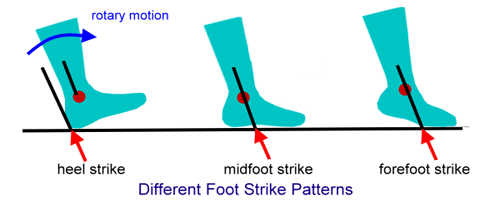

A. Heel Strike (Pendaratan Tumit)
Artinya: Pelari mendarat dengan tumit terlebih dahulu menyentuh tanah.
Populasi: Sangat umum, mencakup sekitar 75-90% pelari rekreasional/pemula.
Kebutuhan Sepatu: Membutuhkan bantalan (cushioning) yang tebal di bagian tumit untuk meredam benturan (impact). Biasanya memiliki High Drop (8mm - 12mm).

B. Mid/Forefoot Strike (Pendaratan Tengah/Depan)
Artinya: Pelari mendarat dengan bagian tengah atau depan kaki (jinjit).
Populasi: Lebih umum pada pelari cepat, atlet elite, atau pelari minimalis.
Kebutuhan Sepatu: Tidak butuh tumit tebal (karena tumit jarang menyentuh tanah keras). Biasanya butuh sepatu yang responsif dengan Low Drop (0mm - 6mm) agar pendaratan lebih natural.

C. Heel/Mid/Forefoot (Versatile / All-Rounder)
Artinya: Sepatu ini didesain fleksibel untuk mengakomodasi semua gaya lari.
Teknologi: Biasanya menggunakan desain Rocker (lengkungan sol seperti kursi goyang) yang membuat transisi dari tumit ke ujung kaki menjadi mulus (smooth transition).
Cocok untuk: Pelari yang gaya larinya berubah-ubah tergantung kelelahan (misal: awal lari midfoot, pas capek jadi heel strike).

### Cleaning code

In [36]:
#  ['-' 'Heel' 'Heel Mid/Forefoot' 'Heelmid/Forefoot' 'Mid/Forefoot']


strike_map = {
    "Mid/Forefoot": "Mid|Forefoot",
    "Heelmid/Forefoot": "Heel|Mid|Forefoot",
    "Heel Mid/Forefoot": "Heel|Mid|Forefoot",
    "-": "-",
    "Heel": "Heel",
}

df["Strike_norm"] = df["Strike pattern"].map(strike_map)

unmapped = df[df["Strike_norm"].isna()]["Strike pattern"].value_counts()
print("UNMAPPED strike values:\n", unmapped)
assert df["Strike_norm"].notna().all()

UNMAPPED strike values:
 Series([], Name: count, dtype: int64)


In [37]:
strike_norm_unique = df["Strike_norm"].dropna().unique()
print(f"Strike - norm : ({len(strike_norm_unique)}) uniques\n", strike_norm_unique)


df["Strike_norm"].value_counts()

Strike - norm : (4) uniques
 <StringArray>
['Heel|Mid|Forefoot', 'Mid|Forefoot', 'Heel', '-']
Length: 4, dtype: str


Strike_norm
Heel|Mid|Forefoot    540
Mid|Forefoot         339
Heel                 290
-                      1
Name: count, dtype: int64

In [38]:
df["Strike_lists"] = df["Strike_norm"].str.split("|")
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Terrain,Pace_norm,Pace_lists,pace_competition,pace_daily_running,pace_tempo,arch_neutral,arch_stability,Strike_norm,Strike_lists
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,NaN,Daily Running|Tempo,"[Daily Running, Tempo]",0,1,1,1,0,Heel|Mid|Forefoot,"[Heel, Mid, Forefoot]"
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,NaN,Daily Running,[Daily Running],0,1,0,1,0,Mid|Forefoot,"[Mid, Forefoot]"
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,NaN,Daily Running,[Daily Running],0,1,0,1,0,Heel|Mid|Forefoot,"[Heel, Mid, Forefoot]"
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,NaN,Daily Running,[Daily Running],0,1,0,1,0,Heel,[Heel]
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,NaN,Daily Running,[Daily Running],0,1,0,1,0,Heel|Mid|Forefoot,"[Heel, Mid, Forefoot]"


In [39]:
'''
# jujur ini vibe ah coding
pace_exploded = df["Pace_lists"].explode()

pace_ohe = (
    pd.crosstab(pace_exploded.index, pace_exploded)
    .reindex(df.index, fill_value=0)   # jaga urutan index sama df
)

# rename kolom biar konsisten untuk ML pipeline
pace_ohe = pace_ohe.rename(columns={
    "Competition": "pace_competition",
    "Daily Running": "pace_daily_running",
    "Tempo": "pace_tempo"
})

# gabung ke df
df = pd.concat([df, pace_ohe], axis=1)
# make sure value-nya bener 0/1
for c in ["pace_competition", "pace_daily_running", "pace_tempo"]:
    assert set(df[c].unique()).issubset({0, 1})
print(df[df["Pace"]=="Competitiontempo"][["Pace","Pace_norm","pace_competition","pace_tempo","pace_daily_running"]].head())
print(df[df["Pace"]=="Daily Runningtempo"][["Pace","Pace_norm","pace_daily_running","pace_tempo","pace_competition"]].head())
print("Rows:", len(df))
print("competition sum:", int(df["pace_competition"].sum()))
print("daily sum:", int(df["pace_daily_running"].sum()))
print("tempo sum:", int(df["pace_tempo"].sum()))
'''

'\n# jujur ini vibe ah coding\npace_exploded = df["Pace_lists"].explode()\n\npace_ohe = (\n    pd.crosstab(pace_exploded.index, pace_exploded)\n    .reindex(df.index, fill_value=0)   # jaga urutan index sama df\n)\n\n# rename kolom biar konsisten untuk ML pipeline\npace_ohe = pace_ohe.rename(columns={\n    "Competition": "pace_competition",\n    "Daily Running": "pace_daily_running",\n    "Tempo": "pace_tempo"\n})\n\n# gabung ke df\ndf = pd.concat([df, pace_ohe], axis=1)\n# make sure value-nya bener 0/1\nfor c in ["pace_competition", "pace_daily_running", "pace_tempo"]:\n    assert set(df[c].unique()).issubset({0, 1})\nprint(df[df["Pace"]=="Competitiontempo"][["Pace","Pace_norm","pace_competition","pace_tempo","pace_daily_running"]].head())\nprint(df[df["Pace"]=="Daily Runningtempo"][["Pace","Pace_norm","pace_daily_running","pace_tempo","pace_competition"]].head())\nprint("Rows:", len(df))\nprint("competition sum:", int(df["pace_competition"].sum()))\nprint("daily sum:", int(df["pace_d

In [40]:
strike_exploded = df["Strike_lists"].explode()

strike_ohe = (
    pd.crosstab(strike_exploded.index, strike_exploded)
    .reindex(df.index, fill_value=0)   # jaga urutan index sama df
)

strike_ohe = strike_ohe.rename(columns={
    "Heel": "strike_heel",
    "Mid": "strike_mid",
    "Forefoot": "strike_forefoot"
})

df = pd.concat([df, strike_ohe], axis=1)


In [41]:
for c in ["strike_heel", "strike_mid", "strike_forefoot"]:
    assert set(df[c].unique()).issubset({0, 1})

In [42]:
print("Rows:", len(df))
print("Heels sum:", int(df["strike_heel"].sum()))
print("Mid sum:", int(df["strike_mid"].sum()))
print("Forefoot sum:", int(df["strike_forefoot"].sum()))

Rows: 1170
Heels sum: 830
Mid sum: 879
Forefoot sum: 879


In [43]:
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,pace_daily_running,pace_tempo,arch_neutral,arch_stability,Strike_norm,Strike_lists,-,strike_forefoot,strike_heel,strike_mid
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,1,1,1,0,Heel|Mid|Forefoot,"[Heel, Mid, Forefoot]",0,1,1,1
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,1,0,1,0,Mid|Forefoot,"[Mid, Forefoot]",0,1,0,1
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,1,0,Heel|Mid|Forefoot,"[Heel, Mid, Forefoot]",0,1,1,1
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,1,0,1,0,Heel,[Heel],0,0,1,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,1,0,Heel|Mid|Forefoot,"[Heel, Mid, Forefoot]",0,1,1,1


# Cleaning Size

In [44]:
# df = df.drop(labels="fit_category", axis=1)
# df = df.drop(labels="fit_large", axis=1)
# df = df.drop(labels="fit_small", axis=1)
# df = df.drop(labels="fit_true", axis=1)
# df = df.drop(labels="fit_missing", axis=1)

# df.head()

In [46]:
df["Size"] = (
    df["Size"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

size_uniques = df["Size"].dropna().unique()
# size_uniques.sort()
size_uniques = sorted(size_uniques)
print(f"Size ({len(size_uniques)} uniques): \n",size_uniques)

df["Size"].value_counts().head(20)

Size (6 uniques): 
 ['-', 'Half Size Large', 'Half Size Small', 'Slightly Large', 'Slightly Small', 'True To Size']


Size
True To Size       797
Slightly Small     231
Half Size Small     59
-                   44
Slightly Large      31
Half Size Large      8
Name: count, dtype: int64

In [47]:
mask = df["Size"].astype(str).str.strip() == "-"
df.loc[mask, ["Brand","Name", "Size"]].assign(
    Size_repr=df.loc[mask, "Size"].apply(repr)
)

,Brand,Name,Size,Size_repr
71,Nike,Air Zoom Pegasus 38 FlyEase,-,'-'
73,Nobull,Allday Knit,-,'-'
74,Nobull,Allday Knit,-,'-'
92,Brooks,Anthem 4,-,'-'
98,Diadora,Atomo Star,-,'-'
186,On,Cloudsurfer Max,-,'-'
298,Altra,Experience Flow 2,-,'-'
331,Saucony,Freedom 4,-,'-'
454,Asics,Gel Kayano Lite 2,-,'-'
474,Asics,Gel Nimbus Lite 3,-,'-'


kenapaaaaaaaa............dia.........strip....doang...

In [48]:
size_map = {
    "Half Size Small": "small",
    "Slightly Small": "small",
    "True To Size": "true",
    "Slightly Large": "large",
    "Half Size Large": "large",
}

df["fit_category"] = df["Size"].map(size_map)

In [49]:
fit_ohe = pd.get_dummies(df["fit_category"], prefix="fit").astype(int)

for col in ["fit_missing", "fit_true", "fit_small", "fit_large"]:
    if col not in fit_ohe.columns:
        fit_ohe[col] = 0

fit_ohe["fit_missing"] = df["fit_category"].isna().astype(int)

df = pd.concat([df, fit_ohe], axis=1)

In [50]:
print(df[["fit_missing","fit_true","fit_small","fit_large"]].sum())
assert (
    df[["fit_missing","fit_true","fit_small","fit_large"]].sum(axis=1) == 1
).all()

fit_missing     44
fit_true       797
fit_small      290
fit_large       39
dtype: int64


yang slightly sama half size gitu langsung dimasukin ke kolom kegedean apa kekecilan. hasilnya begitu

In [51]:
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,Strike_lists,-,strike_forefoot,strike_heel,strike_mid,fit_category,fit_large,fit_small,fit_true,fit_missing
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,"[Heel, Mid, Forefoot]",0,1,1,1,true,0,0,1,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,"[Mid, Forefoot]",0,1,0,1,true,0,0,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,"[Heel, Mid, Forefoot]",0,1,1,1,true,0,0,1,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,[Heel],0,0,1,0,small,0,1,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,"[Heel, Mid, Forefoot]",0,1,1,1,true,0,0,1,0


In [52]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Brand                        1170 non-null   str   
 1   Name                         1170 non-null   str   
 2   Audience score               1164 non-null   str   
 3   Price                        1170 non-null   str   
 4   Pace                         1170 non-null   str   
 5   Arch support                 1170 non-null   str   
 6   Weight lab Weight brand      1170 non-null   str   
 7   Lightweight                  1170 non-null   int64 
 8   Drop lab Drop brand          1170 non-null   str   
 9   Strike pattern               1170 non-null   str   
 10  Size                         1170 non-null   str   
 11  Midsole softness             1170 non-null   str   
 12  Toebox durability            1170 non-null   str   
 13  Heel padding durability      1170 non-null  

In [53]:
# df.rename(columns={"-": "strike_missing"}, inplace=True)

# Cleaning Midsole

In [55]:
df["Midsole softness"] = (
    df["Midsole softness"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

midsole_uniques = df["Midsole softness"].dropna().unique()
# midsole_uniques.sort()
midsole_uniques = sorted(midsole_uniques)
print(f"Midsole ({len(midsole_uniques)} uniques): \n",midsole_uniques)

df["Midsole softness"].value_counts().head(20)

Midsole (4 uniques): 
 ['-', 'Balanced', 'Firm', 'Soft']


Midsole softness
Balanced    543
Soft        504
-            72
Firm         51
Name: count, dtype: int64

In [56]:
mask = df["Midsole softness"].astype(str).str.strip() == "-"
df.loc[mask, ["Brand","Name", "Midsole softness"]].assign(
    midsole_repr=df.loc[mask, "Midsole softness"].apply(repr)
)

,Brand,Name,Midsole softness,midsole_repr
25,Adidas,Adizero Adios Pro 2.0,-,'-'
53,Brooks,Adrenaline GTS 22,-,'-'
70,Nike,Air Zoom Pegasus 38,-,'-'
71,Nike,Air Zoom Pegasus 38 FlyEase,-,'-'
92,Brooks,Anthem 4,-,'-'
...,...,...,...,...
1050,Adidas,Ultraboost 21,-,'-'
1071,Merrell,Vapor Glove 6,-,'-'
1072,Merrell,Vapor Glove 6,-,'-'
1124,Mizuno,Wave Rider 25,-,'-'


In [57]:
# midsole_map = {
   
# }

# df["midsole_category"] = df["Midsole softness"].map(midsole_map)

In [58]:
soft_ohe = pd.get_dummies(df["Midsole softness"], prefix="midsole").astype(int)

# pastikan kolom konsisten untuk pipeline
for col in ["midsole_Soft", "midsole_Balanced", "midsole_Firm"]:
    if col not in soft_ohe.columns:
        soft_ohe[col] = 0

# jujur enakan lowercase
soft_ohe = soft_ohe.rename(columns={
    "midsole_Soft": "midsole_soft",
    "midsole_Balanced": "midsole_balanced",
    "midsole_Firm": "midsole_firm"
})


In [59]:
df = pd.concat([df, soft_ohe[["midsole_soft","midsole_balanced","midsole_firm"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,strike_heel,strike_mid,fit_category,fit_large,fit_small,fit_true,fit_missing,midsole_soft,midsole_balanced,midsole_firm
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,1,1,true,0,0,1,0,0,1,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,1,true,0,0,1,0,1,0,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,1,1,true,0,0,1,0,0,0,1
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,1,0,small,0,1,0,0,0,0,1
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,1,true,0,0,1,0,0,0,1


In [60]:
print("Rows:", len(df))
print("Soft:", int(df["midsole_soft"].sum()))
print("Balanced:", int(df["midsole_balanced"].sum()))
print("Firm:", int(df["midsole_firm"].sum()))

missing_midsole = (df[["midsole_soft","midsole_balanced","midsole_firm"]].sum(axis=1) == 0).sum()
print("Missing midsole softness rows:", int(missing_midsole))

Rows: 1170
Soft: 504
Balanced: 543
Firm: 51
Missing midsole softness rows: 72


maaf kalo kurang berprinsip, nanti deh analisis asumsi rangkuman itunya

### Analisis Midsole Softness 
A. Soft
Rasa: empuk, plush, compressible
Cocok untuk: easy run, long run, recovery
Kelebihan: nyaman, ramah kaki, menyerap impact
Kekurangan: responsivitas lebih rendah, bisa terasa “tenggelam” saat ngebut

B. Balanced
Rasa: seimbang antara empuk dan firm
Cocok untuk: daily running serbaguna, tempo ringan
Kelebihan: stabil, fleksibel, paling aman untuk mayoritas pelari
Kekurangan: tidak se-empuk soft, tidak se-responsif firm

C. Firm
Rasa: padat, minim kompresi
Cocok untuk: tempo run, interval, racing
Kelebihan: responsif, efisien energi, stabil saat pace cepat
Kekurangan: kurang nyaman untuk jarak jauh santai

# Cleaning Toebox durability

In [62]:
df["Toebox durability"] = (
    df["Toebox durability"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

toebox_uniques = df["Toebox durability"].dropna().unique()
# toebox_uniques.sort()
toebox_uniques = sorted(toebox_uniques)
print(f"Toebox ({len(toebox_uniques)} uniques): \n",toebox_uniques)

df["Toebox durability"].value_counts()

Toebox (4 uniques): 
 ['-', 'Bad', 'Decent', 'Good']


Toebox durability
Decent    486
Bad       263
Good      247
-         174
Name: count, dtype: int64

In [63]:
toe_ohe = pd.get_dummies(df["Toebox durability"], prefix="toebox").astype(int)

for col in ["toebox_Bad", "toebox_Decent", "toebox_Good"]:
    if col not in toe_ohe.columns:
        toe_ohe[col] = 0

toe_ohe = toe_ohe.rename(columns={
    "toebox_Bad": "toebox_bad",
    "toebox_Decent": "toebox_decent",
    "toebox_Good": "toebox_good"
})

df = pd.concat([df, toe_ohe[["toebox_bad","toebox_decent","toebox_good"]]], axis=1)


In [64]:
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,fit_large,fit_small,fit_true,fit_missing,midsole_soft,midsole_balanced,midsole_firm,toebox_bad,toebox_decent,toebox_good
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,1,0,0,1,0,0,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,0,1,0,1,0,0,0,0,1
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,1,0,0,0,1,0,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,1,0,0,0,0,1,0,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,1,0,0,0,1,0,0,1


In [65]:
print("Rows:", len(df))
print("Bad:", int(df["toebox_bad"].sum()))
print("Decent:", int(df["toebox_decent"].sum()))
print("Good:", int(df["toebox_good"].sum()))
print("Missing toebox rows:",
      int((df[["toebox_bad","toebox_decent","toebox_good"]].sum(axis=1) == 0).sum()))


Rows: 1170
Bad: 263
Decent: 486
Good: 247
Missing toebox rows: 174


### Analisis Toebox Durability
Toebox durability menggambarkan ketahanan bagian depan sepatu (area jari kaki) terhadap aus, robek, atau jebol akibat gesekan dan tekanan saat berlari. Fitur ini tidak berhubungan dengan kenyamanan, tapi umur pakai sepatu, terutama untuk pelari dengan tekanan forefoot tinggi atau mileage besar.

A. Bad = Toebox mudah aus / cepat rusak
Umum pada sepatu:
- sangat ringan
- racing-oriented
Risiko: cepat jebol jika dipakai intens
Trade-off: biasanya lebih breathable & ringan

B. Decent = Ketahanan cukup untuk pemakaian normal
Aman untuk:
- daily running
- latihan reguler
Trade-off: tidak sekuat kategori “Good”, tapi seimbang

C. Good = Toebox kuat dan tahan lama
Cocok untuk:
- mileage tinggi
- forefoot striker
- pemakaian kasar / jangka panjang
Trade-off: kadang sedikit lebih berat atau kurang breathable

# Cleaning Heel padding durability

In [67]:
df["Heel padding durability"] = (
    df["Heel padding durability"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

heel_padding_uniques = df["Heel padding durability"].dropna().unique()
# heel_padding_uniques.sort()
heel_padding_uniques = sorted(heel_padding_uniques)
print(f"Heel padding ({len(heel_padding_uniques)} uniques): \n",heel_padding_uniques)

df["Heel padding durability"].value_counts()

Heel padding (4 uniques): 
 ['-', 'Bad', 'Decent', 'Good']


Heel padding durability
Good      555
Decent    248
Bad       191
-         176
Name: count, dtype: int64

In [68]:
hpd_ohe = pd.get_dummies(df["Heel padding durability"], prefix="heel_pad").astype(int)


for col in ["heel_pad_Bad", "heel_pad_Decent", "heel_pad_Good"]:
    if col not in hpd_ohe.columns:
        hpd_ohe[col] = 0


hpd_ohe = hpd_ohe.rename(columns={
    "heel_pad_Bad": "heelpad_bad",
    "heel_pad_Decent": "heelpad_decent",
    "heel_pad_Good": "heelpad_good"
})

df = pd.concat([df, hpd_ohe[["heelpad_bad", "heelpad_decent", "heelpad_good"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,fit_missing,midsole_soft,midsole_balanced,midsole_firm,toebox_bad,toebox_decent,toebox_good,heelpad_bad,heelpad_decent,heelpad_good
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,1,0,0,0,0,0,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,1,0,0,0,0,1,0,0,1
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,1,0,0,0,0,0,1
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,0,1,0,0,0,0,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,1,0,0,1,0,0,1


In [69]:
print("Rows:", len(df))
print("Bad:", int(df["heelpad_bad"].sum()))
print("Decent:", int(df["heelpad_decent"].sum()))
print("Good:", int(df["heelpad_good"].sum()))
print("Missing heelpad durability rows:",
      int((df[["heelpad_bad","heelpad_decent","heelpad_good"]].sum(axis=1) == 0).sum()))


Rows: 1170
Bad: 191
Decent: 248
Good: 555
Missing heelpad durability rows: 176


makin banyak missingnya bre

### Analisis Heel Padding Durability
Heel padding durability menggambarkan ketahanan bantalan di area tumit bagian dalam sepatu terhadap aus, kempes, atau rusak akibat gesekan dan tekanan berulang saat berlari. Fitur ini berpengaruh pada kenyamanan jangka panjang, stabilitas tumit, dan umur pakai sepatu, terutama bagi pelari yang dominan heel strike.

Bad: 
Bantalan tumit cepat aus atau kempes
Berpotensi menyebabkan:
rasa tidak nyaman
gesekan berlebih di tumit
Umum pada sepatu:
ringan
fokus ke performa jangka pendek
Trade-off: bobot lebih ringan, tapi durability rendah

Decent: 
Ketahanan bantalan cukup untuk pemakaian normal
Aman untuk:
daily running
latihan reguler
Trade-off: tidak sekuat kategori “Good”, tapi seimbang

Good: 
Bantalan tumit kuat dan tahan lama
Cocok untuk:
mileage tinggi
pemakaian jangka panjang
pelari heel strike
Trade-off: kadang sedikit lebih berat atau kurang breathable

# Cleaning Outsole Durability

In [71]:
df["Outsole durability"] = (
    df["Outsole durability"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

outsole_uniques = df["Outsole durability"].dropna().unique()
# outsole_uniques.sort()
outsole_uniques = sorted(outsole_uniques)
print(f"Outsole ({len(outsole_uniques)} uniques): \n",outsole_uniques)

df["Outsole durability"].value_counts()

Outsole (4 uniques): 
 ['-', 'Bad', 'Decent', 'Good']


Outsole durability
Good      631
Decent    253
-         209
Bad        77
Name: count, dtype: int64

In [72]:
out_ohe = pd.get_dummies(df["Outsole durability"], prefix="outsole").astype(int)

for col in ["outsole_Bad", "outsole_Decent", "outsole_Good"]:
    if col not in out_ohe.columns:
        out_ohe[col] = 0

out_ohe = out_ohe.rename(columns={
    "outsole_Bad": "outsole_bad",
    "outsole_Decent": "outsole_decent",
    "outsole_Good": "outsole_good"
})

df = pd.concat([df, out_ohe[["outsole_bad","outsole_decent","outsole_good"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,midsole_firm,toebox_bad,toebox_decent,toebox_good,heelpad_bad,heelpad_decent,heelpad_good,outsole_bad,outsole_decent,outsole_good
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,0,0,0,0,0,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,0,0,1,0,0,1,0,0,1
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,0,0,0,0,1,0,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,1,0,0,0,0,0,0,0,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,0,1,0,0,1,0,0,1


In [73]:
# hanya 0 / 1
for c in ["outsole_bad","outsole_decent","outsole_good"]:
    assert set(df[c].unique()).issubset({0, 1})

# single-label atau missing
assert df[["outsole_bad","outsole_decent","outsole_good"]].sum(axis=1).le(1).all()

print(df[["outsole_bad","outsole_decent","outsole_good"]].sum())
print("Missing outsole rows:",
      int((df[["outsole_bad","outsole_decent","outsole_good"]].sum(axis=1) == 0).sum()))

outsole_bad        77
outsole_decent    253
outsole_good      631
dtype: int64
Missing outsole rows: 209


### Analisis Outsole Durability

Outsole durability menggambarkan ketahanan sol bagian bawah sepatu terhadap aus akibat kontak langsung dengan permukaan lari (aspal, beton, treadmill, track).

Fitur ini berhubungan langsung dengan umur pakai sepatu dan efisiensi biaya, terutama bagi pelari dengan mileage tinggi atau yang sering berlari di permukaan keras.

- Bad: 
Outsole cepat aus
Grip dan perlindungan cepat menurun
Umum pada sepatu:
ringan
racing-oriented
Trade-off: bobot ringan, tapi umur pakai pendek

- Decent: 
Ketahanan cukup untuk pemakaian normal
Aman untuk:
daily running
latihan reguler
Trade-off: bukan yang paling awet, tapi seimbang

- Good: 
Outsole sangat tahan lama
Cocok untuk:
mileage tinggi
pemakaian jangka panjang
lari di permukaan kasar
Trade-off: kadang lebih berat atau kurang fleksibel

# Cleaning Breathability

In [74]:
# df = df.drop(labels="breathable", axis=1)
# df = df.drop(labels="moderate", axis=1)
# df = df.drop(labels="warm", axis=1)
# df.head()

In [76]:
df["Breathability"] = (
    df["Breathability"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

breathability_uniques = df["Breathability"].dropna().unique()
# breathability_uniques.sort()
breathability_uniques = sorted(breathability_uniques)
print(f"Breathability ({len(breathability_uniques)} uniques): \n",breathability_uniques)

df["Breathability"].value_counts()

Breathability (4 uniques): 
 ['-', 'Breathable', 'Moderate', 'Warm']


Breathability
Moderate      642
Breathable    347
Warm          118
-              63
Name: count, dtype: int64

In [77]:
breath_ohe = pd.get_dummies(df["Breathability"], prefix="breath").astype(int)

for col in ["breath_Breathable", "breath_Moderate", "breath_Warm"]:
    if col not in breath_ohe.columns:
        breath_ohe[col] = 0

breath_ohe = breath_ohe.rename(columns={
    "breath_Breathable": "breath_breathable",
    "breath_Moderate": "breath_moderate",
    "breath_Warm": "breath_warm"
})

df = pd.concat([df, breath_ohe[["breath_breathable","breath_moderate","breath_warm"]]], axis=1)
df.head()


,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,toebox_good,heelpad_bad,heelpad_decent,heelpad_good,outsole_bad,outsole_decent,outsole_good,breath_breathable,breath_moderate,breath_warm
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,0,0,0,0,0,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,1,0,0,1,0,0,1,1,0,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,1,0,0,0,0,0,1
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,0,0,0,0,0,0,0,1
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,0,1,0,0,1,0,0,1


In [78]:
# hanya 0 / 1
for c in ["breath_breathable","breath_moderate","breath_warm"]:
    assert set(df[c].unique()).issubset({0, 1})

# single-label atau missing
assert df[["breath_breathable","breath_moderate","breath_warm"]].sum(axis=1).le(1).all()

print(df[["breath_breathable","breath_moderate","breath_warm"]].sum())
print("Missing breathability rows:",
      int((df[["breath_breathable","breath_moderate","breath_warm"]].sum(axis=1) == 0).sum()))

breath_breathable    347
breath_moderate      642
breath_warm          118
dtype: int64
Missing breathability rows: 63


### Analisis Breathability

Breathability menggambarkan seberapa baik sepatu memungkinkan sirkulasi udara di bagian upper, yang berpengaruh pada suhu kaki, kenyamanan, dan manajemen kelembapan saat berlari.

Fitur ini penting terutama untuk:

lari jarak jauh

cuaca panas

pelari dengan kaki mudah berkeringat

Breathable

Sirkulasi udara sangat baik

Kaki terasa lebih sejuk dan kering

Cocok untuk:

cuaca panas

long run

Trade-off: biasanya material lebih tipis → durability bisa lebih rendah

Moderate

Sirkulasi udara cukup / seimbang

Aman untuk pemakaian umum

Cocok untuk:

daily running

berbagai kondisi cuaca

Trade-off: tidak seadem “Breathable”, tidak sehangat “Warm”

Warm

Ventilasi minim

Menjaga kaki tetap hangat

Cocok untuk:

cuaca dingin

winter running

Trade-off: kaki bisa terasa panas di cuaca hangat

# Cleaning Width / fit

In [80]:
df["Width / fit"] = (
    df["Width / fit"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

width_uniques = df["Width / fit"].dropna().unique()
# width_uniques.sort()
width_uniques = sorted(width_uniques)
print(f"Width / fit ({len(width_uniques)} uniques): \n",width_uniques)

df["Width / fit"].value_counts()

Width / fit (3 uniques): 
 ['Medium', 'Narrow', 'Wide']


Width / fit
Medium    786
Narrow    287
Wide       97
Name: count, dtype: int64

In [81]:
width_ohe = pd.get_dummies(df["Width / fit"], prefix="width").astype(int)

for col in ["width_Narrow", "width_Medium", "width_Wide"]:
    if col not in width_ohe.columns:
        width_ohe[col] = 0

width_ohe = width_ohe.rename(columns={
    "width_Narrow": "width_narrow",
    "width_Medium": "width_medium",
    "width_Wide": "width_wide"
})

df = pd.concat([df, width_ohe[["width_narrow","width_medium","width_wide"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,heelpad_good,outsole_bad,outsole_decent,outsole_good,breath_breathable,breath_moderate,breath_warm,width_narrow,width_medium,width_wide
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,0,0,0,0,1,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,1,0,0,1,1,0,0,1,0,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,0,0,0,0,1,1,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,0,0,0,0,1,1,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,0,1,0,0,1,1,0,0


In [82]:
# hanya 0 / 1
for c in ["width_narrow","width_medium","width_wide"]:
    assert set(df[c].unique()).issubset({0, 1})

# HARUS tepat satu (tidak ada missing)
assert (df[["width_narrow","width_medium","width_wide"]].sum(axis=1) == 1).all()

print(df[["width_narrow","width_medium","width_wide"]].sum())

width_narrow    287
width_medium    786
width_wide       97
dtype: int64


### Analisis Width / Fit

Width / fit menggambarkan lebar sepatu pada bagian forefoot (area depan kaki), yang memengaruhi kenyamanan, stabilitas, dan risiko lecet saat berlari.

Fitur ini bukan soal ukuran panjang (EU/US), melainkan ruang horizontal untuk kaki.

Narrow

Sepatu terasa lebih sempit dari standar

Cocok untuk:

kaki ramping

pelari yang suka fit ketat

Risiko: tekanan di sisi kaki jika dipakai oleh kaki lebar

Medium

Lebar standar / normal

Cocok untuk:

mayoritas pelari

Catatan: ini adalah default fit di pasaran

Wide

Sepatu menyediakan ruang lebih lega

Cocok untuk:

kaki lebar

pelari yang sering merasa jari tertekan

Trade-off: bisa terasa kurang “locked-in” untuk kaki sempit

In [83]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Brand                        1170 non-null   str   
 1   Name                         1170 non-null   str   
 2   Audience score               1164 non-null   str   
 3   Price                        1170 non-null   str   
 4   Pace                         1170 non-null   str   
 5   Arch support                 1170 non-null   str   
 6   Weight lab Weight brand      1170 non-null   str   
 7   Lightweight                  1170 non-null   int64 
 8   Drop lab Drop brand          1170 non-null   str   
 9   Strike pattern               1170 non-null   str   
 10  Size                         1170 non-null   str   
 11  Midsole softness             1170 non-null   str   
 12  Toebox durability            1170 non-null   str   
 13  Heel padding durability      1170 non-null  

# Cleaning Toebox Width

In [85]:
df["Toebox width"] = (
    df["Toebox width"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

toebox_uniques = df["Toebox width"].dropna().unique()
# toebox_uniques.sort()
toebox_uniques = sorted(toebox_uniques)
print(f"Toebox width ({len(toebox_uniques)} uniques): \n",toebox_uniques)

df["Toebox width"].value_counts()

Toebox width (4 uniques): 
 ['-', 'Medium', 'Narrow', 'Wide']


Toebox width
Medium    669
Wide      179
Narrow    170
-         152
Name: count, dtype: int64

In [86]:
tw_ohe = pd.get_dummies(df["Toebox width"], prefix="toeboxwidth").astype(int)

for col in ["toeboxwidth_Narrow", "toeboxwidth_Medium", "toeboxwidth_Wide"]:
    if col not in tw_ohe.columns:
        tw_ohe[col] = 0

tw_ohe = tw_ohe.rename(columns={
    "toeboxwidth_Narrow": "toeboxwidth_narrow",
    "toeboxwidth_Medium": "toeboxwidth_medium",
    "toeboxwidth_Wide": "toeboxwidth_wide"
})

df = pd.concat([df, tw_ohe[["toeboxwidth_narrow","toeboxwidth_medium","toeboxwidth_wide"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,outsole_good,breath_breathable,breath_moderate,breath_warm,width_narrow,width_medium,width_wide,toeboxwidth_narrow,toeboxwidth_medium,toeboxwidth_wide
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,0,1,0,0,0,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,1,1,0,0,1,0,0,0,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,1,1,0,0,0,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,0,1,1,0,0,0,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,0,0,1,1,0,0,0,1,0


In [87]:
# hanya 0 / 1
for c in ["toeboxwidth_narrow","toeboxwidth_medium","toeboxwidth_wide"]:
    assert set(df[c].unique()).issubset({0, 1})

# single-label atau missing
assert df[["toeboxwidth_narrow","toeboxwidth_medium","toeboxwidth_wide"]].sum(axis=1).le(1).all()

print(df[["toeboxwidth_narrow","toeboxwidth_medium","toeboxwidth_wide"]].sum())
print(
    "Missing toebox width rows:",
    int((df[["toeboxwidth_narrow","toeboxwidth_medium","toeboxwidth_wide"]].sum(axis=1) == 0).sum())
)

toeboxwidth_narrow    170
toeboxwidth_medium    669
toeboxwidth_wide      179
dtype: int64
Missing toebox width rows: 152


### Analisis Toebox Width

Toebox width menggambarkan lebar ruang di bagian depan sepatu (area jari kaki).
Fitur ini memengaruhi kenyamanan jari, risiko lecet, dan rasa sempit/lega saat berlari, terutama pada jarak jauh.

Berbeda dengan Width / fit (lebar sepatu secara umum), toebox width fokus ke area jari kaki.

Narrow

Ruang jari sempit

Cocok untuk:

kaki ramping

pelari yang suka fit ketat

Risiko: tekanan pada jari kaki, potensi lecet

Medium

Ruang jari standar

Cocok untuk:

mayoritas pelari

Catatan: ini adalah default di pasaran

Wide

Ruang jari lebih lega

Cocok untuk:

kaki lebar

pelari yang sering merasa jari tertekan

Trade-off: bisa terasa kurang “locked-in” bagi kaki sempit

# Cleaning Stiffness

In [89]:
df["Stiffness"] = (
    df["Stiffness"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

stiffness_uniques = df["Stiffness"].dropna().unique()
# stiffness_uniques.sort()
stiffness_uniques = sorted(stiffness_uniques)
print(f"Stiffness ({len(stiffness_uniques)} uniques): \n",stiffness_uniques)

df["Stiffness"].value_counts()

Stiffness (4 uniques): 
 ['-', 'Flexible', 'Moderate', 'Stiff']


Stiffness
Moderate    530
Stiff       510
Flexible    114
-            16
Name: count, dtype: int64

In [90]:
stiff_ohe = pd.get_dummies(df["Stiffness"], prefix="stiff").astype(int)

for col in ["stiff_Flexible", "stiff_Moderate", "stiff_Stiff"]:
    if col not in stiff_ohe.columns:
        stiff_ohe[col] = 0

stiff_ohe = stiff_ohe.rename(columns={
    "stiff_Flexible": "stiff_flexible",
    "stiff_Moderate": "stiff_moderate",
    "stiff_Stiff": "stiff_stiff"
})

df = pd.concat([df, stiff_ohe[["stiff_flexible","stiff_moderate","stiff_stiff"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,breath_warm,width_narrow,width_medium,width_wide,toeboxwidth_narrow,toeboxwidth_medium,toeboxwidth_wide,stiff_flexible,stiff_moderate,stiff_stiff
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,1,0,0,0,0,0,0,0,1
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,1,0,0,0,1,0,0,0,1
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,1,1,0,0,0,0,0,0,0,1
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,1,1,0,0,0,0,0,0,0,1
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,1,1,0,0,0,1,0,0,1,0


In [91]:
# hanya 0 / 1
for c in ["stiff_flexible","stiff_moderate","stiff_stiff"]:
    assert set(df[c].unique()).issubset({0, 1})

# single-label atau missing
assert df[["stiff_flexible","stiff_moderate","stiff_stiff"]].sum(axis=1).le(1).all()

print(df[["stiff_flexible","stiff_moderate","stiff_stiff"]].sum())
print(
    "Missing stiffness rows:",
    int((df[["stiff_flexible","stiff_moderate","stiff_stiff"]].sum(axis=1) == 0).sum())
)


stiff_flexible    114
stiff_moderate    530
stiff_stiff       510
dtype: int64
Missing stiffness rows: 16


### Analisis Stiffness
Stiffness menggambarkan tingkat kekakuan sepatu secara keseluruhan, terutama saat sepatu ditekuk atau diberi beban.
Fitur ini memengaruhi fleksibilitas langkah, responsivitas, dan kenyamanan.

Berbeda dengan torsional rigidity atau heel counter stiffness, stiffness di sini bersifat global.

Flexible

Sepatu mudah ditekuk

Memberikan rasa:

natural

bebas

Cocok untuk:

easy run

pelari yang suka feel santai

Trade-off: stabilitas & responsivitas lebih rendah

Moderate

Kekakuan seimbang

Cocok untuk:

daily running

penggunaan serbaguna

Catatan: ini kategori paling aman & umum

Stiff

Sepatu kaku dan stabil

Cocok untuk:

tempo run

sepatu dengan plate

lari cepat

Trade-off: kurang nyaman untuk pace santai atau jarak jauh

# Cleaning Torsional rigidity

In [93]:
df["Torsional rigidity"] = (
    df["Torsional rigidity"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

torsional_rigidity_uniques = df["Torsional rigidity"].dropna().unique()
# torsional_rigidity_uniques.sort()
torsional_rigidity_uniques = sorted(torsional_rigidity_uniques)
print(f"Torsional rigidity ({len(torsional_rigidity_uniques)} uniques): \n",torsional_rigidity_uniques)

df["Torsional rigidity"].value_counts()

Torsional rigidity (4 uniques): 
 ['-', 'Flexible', 'Moderate', 'Stiff']


Torsional rigidity
Stiff       610
Moderate    368
Flexible    174
-            18
Name: count, dtype: int64

In [94]:
tors_ohe = pd.get_dummies(df["Torsional rigidity"], prefix="torsion").astype(int)

for col in ["torsion_Flexible", "torsion_Moderate", "torsion_Stiff"]:
    if col not in tors_ohe.columns:
        tors_ohe[col] = 0

tors_ohe = tors_ohe.rename(columns={
    "torsion_Flexible": "torsion_flexible",
    "torsion_Moderate": "torsion_moderate",
    "torsion_Stiff": "torsion_stiff"
})

df = pd.concat([df, tors_ohe[["torsion_flexible","torsion_moderate","torsion_stiff"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,width_wide,toeboxwidth_narrow,toeboxwidth_medium,toeboxwidth_wide,stiff_flexible,stiff_moderate,stiff_stiff,torsion_flexible,torsion_moderate,torsion_stiff
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,0,0,0,1,0,0,1
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,0,1,0,0,0,1,0,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,0,0,0,1,1,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,0,0,0,0,1,1,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,1,0,0,1,0,1,0,0


In [95]:
# hanya 0 / 1
for c in ["torsion_flexible","torsion_moderate","torsion_stiff"]:
    assert set(df[c].unique()).issubset({0, 1})

# single-label atau missing
assert df[["torsion_flexible","torsion_moderate","torsion_stiff"]].sum(axis=1).le(1).all()

print(df[["torsion_flexible","torsion_moderate","torsion_stiff"]].sum())
print(
    "Missing torsional rigidity rows:",
    int((df[["torsion_flexible","torsion_moderate","torsion_stiff"]].sum(axis=1) == 0).sum())
)


torsion_flexible    174
torsion_moderate    368
torsion_stiff       610
dtype: int64
Missing torsional rigidity rows: 18


### Analisis Torsional Rigidity

Torsional rigidity menggambarkan seberapa sulit sepatu dipuntir (twist) dari depan ke belakang.
Fitur ini berhubungan dengan stabilitas lateral, kontrol kaki, dan dukungan saat mendarat.

Berbeda dengan overall stiffness (tekuk depan-belakang), torsional rigidity fokus pada puntiran samping.

Flexible

Sepatu mudah dipuntir

Memberikan feel:

natural

bebas

Cocok untuk:

pelari dengan gait stabil

easy run

Trade-off: stabilitas lebih rendah

Moderate

Tingkat puntiran seimbang

Cocok untuk:

daily running

mayoritas pelari

Catatan: kategori paling aman & umum

Stiff

Sepatu sulit dipuntir

Memberikan:

stabilitas tinggi

kontrol tambahan

Cocok untuk:

pelari yang butuh support

sepatu berstruktur / plated

Trade-off: feel lebih kaku

# Cleaning Heel counter stiffness

In [97]:
df["Heel counter stiffness"] = (
    df["Heel counter stiffness"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

heel_counter_stiffness_uniques = df["Heel counter stiffness"].dropna().unique()
# heel_counter_stiffness_uniques.sort()
heel_counter_stiffness_uniques = sorted(heel_counter_stiffness_uniques)
print(f"Heel counter stiffness ({len(heel_counter_stiffness_uniques)} uniques): \n",heel_counter_stiffness_uniques)

df["Heel counter stiffness"].value_counts()

Heel counter stiffness (4 uniques): 
 ['-', 'Flexible', 'Moderate', 'Stiff']


Heel counter stiffness
Moderate    419
Stiff       368
Flexible    351
-            32
Name: count, dtype: int64

In [98]:
hc_ohe = pd.get_dummies(df["Heel counter stiffness"], prefix="heelcounter").astype(int)

for col in ["heelcounter_Flexible", "heelcounter_Moderate", "heelcounter_Stiff"]:
    if col not in hc_ohe.columns:
        hc_ohe[col] = 0

hc_ohe = hc_ohe.rename(columns={
    "heelcounter_Flexible": "heelcounter_flexible",
    "heelcounter_Moderate": "heelcounter_moderate",
    "heelcounter_Stiff": "heelcounter_stiff"
})

df = pd.concat([df, hc_ohe[["heelcounter_flexible","heelcounter_moderate","heelcounter_stiff"]]], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,toeboxwidth_wide,stiff_flexible,stiff_moderate,stiff_stiff,torsion_flexible,torsion_moderate,torsion_stiff,heelcounter_flexible,heelcounter_moderate,heelcounter_stiff
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,1,0,0,1,1,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,0,0,1,0,1,0,0,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,0,1,1,0,0,1,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,0,1,1,0,0,0,1,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,1,0,1,0,0,1,0,0


In [99]:
# hanya 0 / 1
for c in ["heelcounter_flexible","heelcounter_moderate","heelcounter_stiff"]:
    assert set(df[c].unique()).issubset({0, 1})

# single-label atau missing
assert df[["heelcounter_flexible","heelcounter_moderate","heelcounter_stiff"]].sum(axis=1).le(1).all()

print(df[["heelcounter_flexible","heelcounter_moderate","heelcounter_stiff"]].sum())
print(
    "Missing heel counter rows:",
    int((df[["heelcounter_flexible","heelcounter_moderate","heelcounter_stiff"]].sum(axis=1) == 0).sum())
)

heelcounter_flexible    351
heelcounter_moderate    419
heelcounter_stiff       368
dtype: int64
Missing heel counter rows: 32


### Analisis Heel Counter Stiffness

Heel counter stiffness menggambarkan tingkat kekakuan struktur di bagian tumit belakang sepatu (heel counter), yang berfungsi menjaga tumit tetap stabil dan terkunci saat berlari.

Fitur ini berpengaruh pada stabilitas tumit, kontrol kaki, dan rasa aman saat mendarat, terutama untuk pelari heel strike atau yang membutuhkan support tambahan.

Flexible

Heel counter mudah ditekan

Memberikan rasa:

lebih nyaman

lebih natural

Cocok untuk:

pelari dengan gait stabil

sepatu santai / fleksibel

Trade-off: stabilitas tumit lebih rendah

Moderate

Kekakuan seimbang

Cocok untuk:

daily running

mayoritas pelari

Catatan: ini kategori paling aman & umum

Stiff

Heel counter kaku dan kokoh

Memberikan:

stabilitas tumit tinggi

rasa “locked-in”

Cocok untuk:

pelari yang butuh support

sepatu berstruktur / plated

Trade-off: bisa terasa kurang nyaman bagi sebagian orang

# Cleaning Widths available

In [101]:
df["Widths available"] = (
    df["Widths available"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

widths_available_uniques = df["Widths available"].dropna().unique()
# widths_available_uniques.sort()
widths_available_uniques = sorted(widths_available_uniques)
print(f"Widths available ({len(widths_available_uniques)} uniques): \n",widths_available_uniques)

df["Widths available"].value_counts()

Widths available (11 uniques): 
 ['Narrow Normal Wide X-Wide', 'Narrownormal', 'Narrownormalwide', 'Narrownormalwidex-Wide', 'Narrownormalx-Wide', 'Normal', 'Normal Wide', 'Normal Wide X-Wide', 'Normalwide', 'Normalwidex-Wide', 'Normalx-Wide']


Widths available
Normal                       537
Normalwide                   353
Normalwidex-Wide             166
Narrownormalwidex-Wide        68
Narrownormal                  19
Normalx-Wide                  18
Narrownormalwide               4
Normal Wide X-Wide             2
Narrow Normal Wide X-Wide      1
Normal Wide                    1
Narrownormalx-Wide             1
Name: count, dtype: int64

In [102]:
wa_map = {
    "Normal": "Normal",
    "Normalwide": "Normal|Wide",
    "Normalwidex-Wide": "Normal|Wide|X-Wide",
    "Narrownormalwidex-Wide": "Narrow|Normal|Wide|X-Wide",
    "Normalx-Wide": "Normal|X-Wide",
    "Narrownormal": "Narrow|Normal",
    "Narrownormalwide": "Narrow|Normal|Wide",
    "Normal Wide X-Wide": "Normal|Wide|X-Wide",
    "Narrow Normal Wide X-Wide": "Narrow|Normal|Wide|X-Wide",
    "Normal Wide": "Normal|Wide",
    "Narrownormalx-Wide": "Narrow|Normal|X-Wide",
}

df["widthavail_norm"] = df["Widths available"].map(wa_map)

unmapped = df[df["widthavail_norm"].isna()]["Widths available"].value_counts()
print("UNMAPPED Widths available values:\n", unmapped)
assert df["widthavail_norm"].notna().all()

UNMAPPED Widths available values:
 Series([], Name: count, dtype: int64)


In [103]:
wa_norm_unique = df["widthavail_norm"].dropna().unique()
print(f'Widths available - norm: ({len(wa_norm_unique)}) uniques\n', wa_norm_unique)

print(df["widthavail_norm"].value_counts())

Widths available - norm: (8) uniques
 <StringArray>
[              'Normal|Wide',                    'Normal',
 'Narrow|Normal|Wide|X-Wide',             'Normal|X-Wide',
        'Narrow|Normal|Wide',        'Normal|Wide|X-Wide',
             'Narrow|Normal',      'Narrow|Normal|X-Wide']
Length: 8, dtype: str
widthavail_norm
Normal                       537
Normal|Wide                  354
Normal|Wide|X-Wide           168
Narrow|Normal|Wide|X-Wide     69
Narrow|Normal                 19
Normal|X-Wide                 18
Narrow|Normal|Wide             4
Narrow|Normal|X-Wide           1
Name: count, dtype: int64


In [104]:
df["widthavail_list"] = df["widthavail_norm"].str.split("|")

In [105]:
wa_exploded = df["widthavail_list"].explode()

wa_ohe = (
    pd.crosstab(wa_exploded.index, wa_exploded)
    .reindex(df.index, fill_value=0)
)

wa_ohe = wa_ohe.rename(columns={
    "Narrow": "widthavail_narrow",
    "Normal": "widthavail_normal",
    "Wide": "widthavail_wide",
    "X-Wide": "widthavail_xwide"
})

for col in ["widthavail_narrow", "widthavail_normal", "widthavail_wide", "widthavail_xwide"]:
    if col not in wa_ohe.columns:
        wa_ohe[col] = 0

wa_ohe = wa_ohe[["widthavail_narrow","widthavail_normal","widthavail_wide","widthavail_xwide"]]

df = pd.concat([df, wa_ohe], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,torsion_stiff,heelcounter_flexible,heelcounter_moderate,heelcounter_stiff,widthavail_norm,widthavail_list,widthavail_narrow,widthavail_normal,widthavail_wide,widthavail_xwide
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,1,1,0,0,Normal|Wide,"[Normal, Wide]",0,1,1,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,0,1,0,Normal,[Normal],0,1,0,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,1,0,0,Normal,[Normal],0,1,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,1,0,Normal,[Normal],0,1,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,1,0,0,Normal,[Normal],0,1,0,0


In [106]:
for c in ["widthavail_narrow","widthavail_normal","widthavail_wide","widthavail_xwide"]:
    assert set(df[c].unique()).issubset({0, 1})

In [107]:
print("Rows:", len(df))
print("narrow sum:", int(df["widthavail_narrow"].sum()))
print("normal sum:", int(df["widthavail_normal"].sum()))
print("wide sum:", int(df["widthavail_wide"].sum()))
print("xwide sum:", int(df["widthavail_xwide"].sum()))

print(df[df["Widths available"].isin(["Normalwide","Normalwidex-Wide"])][
    ["Widths available","widthavail_norm","widthavail_normal","widthavail_wide","widthavail_xwide","widthavail_narrow"]
].head(10))

Rows: 1170
narrow sum: 93
normal sum: 1170
wide sum: 595
xwide sum: 256
   Widths available widthavail_norm  widthavail_normal  widthavail_wide  \
0        Normalwide     Normal|Wide                  1                1   
7        Normalwide     Normal|Wide                  1                1   
10       Normalwide     Normal|Wide                  1                1   
11       Normalwide     Normal|Wide                  1                1   
12       Normalwide     Normal|Wide                  1                1   
13       Normalwide     Normal|Wide                  1                1   
14       Normalwide     Normal|Wide                  1                1   
15       Normalwide     Normal|Wide                  1                1   
16       Normalwide     Normal|Wide                  1                1   
17       Normalwide     Normal|Wide                  1                1   

    widthavail_xwide  widthavail_narrow  
0                  0                  0  
7                 

### Analisis Widths Available

Widths available menjelaskan opsi lebar yang tersedia untuk model sepatu tersebut (bukan “fit feel”), misalnya hanya Normal, atau tersedia juga Wide dan X-Wide.

Berbeda dengan Width / fit yang menggambarkan rasa lebar sepatu secara umum, Widths available itu varian produk yang dijual.

Kategori yang relevan

Narrow: opsi lebar sempit tersedia

Normal: opsi standar tersedia

Wide: opsi lebar tersedia

X-Wide: opsi ekstra lebar tersedia

# Cleaning Season

In [109]:
df["Season"] = (
    df["Season"]
    .astype(str)
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
    .str.title()
)

season_uniques = df["Season"].dropna().unique()
# season_uniques.sort()
season_uniques = sorted(season_uniques)
print(f"Season ({len(season_uniques)} uniques): \n",season_uniques)

df["Season"].value_counts()

Season (4 uniques): 
 ['-', 'All Seasons', 'Summerall Seasons', 'Winter']


Season
All Seasons          741
Summerall Seasons    347
-                     63
Winter                19
Name: count, dtype: int64

In [110]:
season_map = {
    "All Seasons": "All",
    "Summerall Seasons": "Summer|All",
    "Winter": "Winter",
    "-": pd.NA,
}

df["season_norm"] = df["Season"].map(season_map)

In [111]:
unmapped = df[df["season_norm"].isna() & df["Season"].ne("-")]["Season"].value_counts()
print("UNMAPPED Season values (should be empty):\n", unmapped)
assert unmapped.empty

UNMAPPED Season values (should be empty):
 Series([], Name: count, dtype: int64)


In [112]:
season_norm_unique = df["season_norm"].unique()
print(f'Season - norm: ({len(season_norm_unique)}) uniques\n', season_norm_unique)
print(df["season_norm"].value_counts())

Season - norm: (4) uniques
 <StringArray>
[nan, 'Summer|All', 'All', 'Winter']
Length: 4, dtype: str
season_norm
All           741
Summer|All    347
Winter         19
Name: count, dtype: int64


In [113]:
df["season_list"] = df["season_norm"].str.split("|")

season_exploded = df["season_list"].explode()

season_ohe = (
    pd.crosstab(season_exploded.index, season_exploded)
    .reindex(df.index, fill_value=0)
)

season_ohe = season_ohe.rename(columns={
    "All": "season_all",
    "Summer": "season_summer",
    "Winter": "season_winter"
})

for col in ["season_all","season_summer","season_winter"]:
    if col not in season_ohe.columns:
        season_ohe[col] = 0

season_ohe = season_ohe[["season_all","season_summer","season_winter"]]

df = pd.concat([df, season_ohe], axis=1)
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,widthavail_list,widthavail_narrow,widthavail_normal,widthavail_wide,widthavail_xwide,season_norm,season_list,season_all,season_summer,season_winter
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,"[Normal, Wide]",0,1,1,0,NaN,NaN,0,0,0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,[Normal],0,1,0,0,Summer|All,"[Summer, All]",1,1,0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,[Normal],0,1,0,0,All,[All],1,0,0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,[Normal],0,1,0,0,All,[All],1,0,0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,[Normal],0,1,0,0,All,[All],1,0,0


jujur janggal temen temen

In [114]:
print("Rows:", len(df))
print("all seasons sum:", int(df["season_all"].sum()))
print("summer sum:", int(df["season_summer"].sum()))
print("winter sum:", int(df["season_winter"].sum()))

Rows: 1170
all seasons sum: 1088
summer sum: 347
winter sum: 19


In [115]:
print(df[df["Season"]=="Summerall Seasons"][
    ["Season","season_norm","season_all","season_summer","season_winter"]
].head())

               Season season_norm  season_all  season_summer  season_winter
1   Summerall Seasons  Summer|All           1              1              0
7   Summerall Seasons  Summer|All           1              1              0
9   Summerall Seasons  Summer|All           1              1              0
10  Summerall Seasons  Summer|All           1              1              0
11  Summerall Seasons  Summer|All           1              1              0


# Split Weight lab Weight brand

In [116]:
# Cek "-" dan null
mask_missing = (
    df["Weight lab Weight brand"].isna() |
    (df["Weight lab Weight brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()

np.int64(0)

In [117]:
# Ambil angka pakai regex
weight = df["Weight lab Weight brand"].str.findall(r"[\d.]+")

# Ubah jadi 4 kolom
df[["weight_lab_oz", "weight_lab_g", "weight_brand_oz", "weight_brand_g"]] = (
    pd.DataFrame(weight.tolist(), index=df.index)
)

# ubah ke numeric
for col in ["weight_lab_oz", "weight_lab_g", "weight_brand_oz", "weight_brand_g"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,widthavail_xwide,season_norm,season_list,season_all,season_summer,season_winter,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,NaN,NaN,0,0,0,7.9,225,8.1,230.0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,0,Summer|All,"[Summer, All]",1,1,0,10.7,304,10.9,309.0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,All,[All],1,0,0,11.9,336,11.5,327.0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,All,[All],1,0,0,12.6,356,12.4,352.0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,All,[All],1,0,0,12.3,348,12.2,345.0


# Split Drop lab Drop Brand

In [118]:
# Cek "-" dan null
mask_missing = (
    df["Drop lab Drop brand"].isna() |
    (df["Drop lab Drop brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()



np.int64(0)

In [119]:
# Ambil angka pakai regex
drop = df["Drop lab Drop brand"].str.findall(r"[\d.]+")

# Ubah jadi 2 kolom
df[["drop_lab_mm", "drop_brand_mm"]] = (
    pd.DataFrame(drop.tolist(), index=df.index)
)

# ubah ke numeric
for col in ["drop_lab_mm", "drop_brand_mm"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,season_list,season_all,season_summer,season_winter,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g,drop_lab_mm,drop_brand_mm
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,NaN,0,0,0,7.9,225,8.1,230.0,9.4,10.0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,"[Summer, All]",1,1,0,10.7,304,10.9,309.0,7.7,8.0
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,[All],1,0,0,11.9,336,11.5,327.0,8.9,10.0
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,[All],1,0,0,12.6,356,12.4,352.0,10.6,11.0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,[All],1,0,0,12.3,348,12.2,345.0,9.9,10.0


In [120]:
# df = df.drop(labels="drop_brand", axis=1)
# df = df.drop(labels="drop_lab", axis=1)
# df.head()

# Split Heel lab dan Heel brand

In [121]:
# Cek "-" dan null
mask_missing = (
    df["Heel lab Heel brand"].isna() |
    (df["Heel lab Heel brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()



np.int64(0)

In [122]:
# Ambil angka pakai regex
Heel = df["Heel lab Heel brand"].str.findall(r"[\d.]+")

# Ubah jadi 2 kolom
df[["heel_lab_mm", "heel_brand_mm"]] = (
    pd.DataFrame(Heel.tolist(), index=df.index)
)

# ubah ke numeric
for col in ["heel_lab_mm", "heel_brand_mm"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,season_summer,season_winter,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g,drop_lab_mm,drop_brand_mm,heel_lab_mm,heel_brand_mm
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,0,0,7.9,225,8.1,230.0,9.4,10.0,32.4,36.0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,1,0,10.7,304,10.9,309.0,7.7,8.0,34.3,32.5
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,11.9,336,11.5,327.0,8.9,10.0,33.3,32.5
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,0,0,12.6,356,12.4,352.0,10.6,11.0,31.8,32.0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,0,0,12.3,348,12.2,345.0,9.9,10.0,32.6,34.0


# Split Forefoot lab dan Forefoot brand


In [123]:
# Cek "-" dan null
mask_missing = (
    df["Forefoot lab Forefoot brand"].isna() |
    (df["Forefoot lab Forefoot brand"].astype(str).str.strip() == "-")
)
mask_missing.sum()


np.int64(0)

In [124]:
# Ambil angka pakai regex
forefoot = df["Forefoot lab Forefoot brand"].str.findall(r"[\d.]+")

# Ubah jadi 2 kolom
df[["forefoot_lab_mm", "forefoot_brand_mm"]] = (
    pd.DataFrame(forefoot.tolist(), index=df.index)
)

# ubah ke numeric
for col in ["forefoot_lab_mm", "forefoot_brand_mm"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g,drop_lab_mm,drop_brand_mm,heel_lab_mm,heel_brand_mm,forefoot_lab_mm,forefoot_brand_mm
0,Brooks,Launch 9,87\n Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,7.9,225,8.1,230.0,9.4,10.0,32.4,36.0,23.0,26.0
1,Brooks,Levitate 6,90\n Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,10.7,304,10.9,309.0,7.7,8.0,34.3,32.5,26.6,24.5
2,Adidas,4DFWD,90\n Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,11.9,336,11.5,327.0,8.9,10.0,33.3,32.5,24.4,22.5
3,Adidas,4DFWD 2,90\n Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,12.6,356,12.4,352.0,10.6,11.0,31.8,32.0,21.2,21.0
4,Adidas,4DFWD 3,88\n Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,12.3,348,12.2,345.0,9.9,10.0,32.6,34.0,22.7,24.0


In [125]:
df["Audience score"] = (
    df["Audience score"]
    .astype(str)
    .str.replace("\n", " - ", regex=False)
    .str.strip()
)


# Remove duplicates

cuma ada 433 shoes road

In [126]:
dup_mask = df.duplicated(subset=["Brand", "Name"], keep="first")
# print(len(dup_mask))
df.loc[dup_mask, ["Brand", "Name"]].head(100)

,Brand,Name
5,Adidas,4DFWD 3
11,Adidas,Adistar 3
12,Adidas,Adistar 3
13,Adidas,Adistar 3
14,Adidas,Adistar 3
...,...,...
163,On,Cloudflyer 5
164,On,Cloudflyer 5
166,On,Cloudgo
169,On,Cloudmonster 2


In [127]:
# sebelum hapus
print("Before:", len(df))

#hapus
df = df.drop_duplicates(subset=["Brand", "Name"], keep="first").reset_index(drop=True)

print("After :", len(df))


Before: 1170
After : 434


In [128]:
dup_mask = df.duplicated(subset=["Brand", "Name"], keep="first")
df.loc[dup_mask, ["Brand", "Name"]].head(20)

,Brand,Name


udah ga ada duplicate, sisa 433 sepatu

# Done cleaned

In [130]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Columns: 102 entries, Brand to forefoot_brand_mm
dtypes: float64(9), int64(55), object(4), str(34)
memory usage: 346.0+ KB


kenapa ada int ya

In [131]:
df.head()

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g,drop_lab_mm,drop_brand_mm,heel_lab_mm,heel_brand_mm,forefoot_lab_mm,forefoot_brand_mm
0,Brooks,Launch 9,87 - Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,7.9,225,8.1,230.0,9.4,10.0,32.4,36.0,23.0,26.0
1,Brooks,Levitate 6,90 - Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,10.7,304,10.9,309.0,7.7,8.0,34.3,32.5,26.6,24.5
2,Adidas,4DFWD,90 - Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,11.9,336,11.5,327.0,8.9,10.0,33.3,32.5,24.4,22.5
3,Adidas,4DFWD 2,90 - Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,12.6,356,12.4,352.0,10.6,11.0,31.8,32.0,21.2,21.0
4,Adidas,4DFWD 3,88 - Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,12.3,348,12.2,345.0,9.9,10.0,32.6,34.0,22.7,24.0


In [132]:
print(df[['Weight lab Weight brand', 'weight_lab_oz', 'weight_lab_g', 'weight_brand_oz',	'weight_brand_g']])

           Weight lab Weight brand  weight_lab_oz  weight_lab_g  \
0      7.9 oz / 225g 8.1 oz / 230g            7.9           225   
1    10.7 oz / 304g 10.9 oz / 309g           10.7           304   
2    11.9 oz / 336g 11.5 oz / 327g           11.9           336   
3    12.6 oz / 356g 12.4 oz / 352g           12.6           356   
4    12.3 oz / 348g 12.2 oz / 345g           12.3           348   
..                             ...            ...           ...   
429   9.8 oz / 279g 10.1 oz / 286g            9.8           279   
430    8.7 oz / 248g 8.6 oz / 244g            8.7           248   
431   10.3 oz / 291g 9.7 oz / 274g           10.3           291   
432        6 oz / 171g 6 oz / 171g            6.0           171   
433    6.9 oz / 196g 6.9 oz / 196g            6.9           196   

     weight_brand_oz  weight_brand_g  
0                8.1           230.0  
1               10.9           309.0  
2               11.5           327.0  
3               12.4           352.0  


In [133]:
df.head(433)

,Brand,Name,Audience score,Price,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,...,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g,drop_lab_mm,drop_brand_mm,heel_lab_mm,heel_brand_mm,forefoot_lab_mm,forefoot_brand_mm
0,Brooks,Launch 9,87 - Great!,$110,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,...,7.9,225,8.1,230.0,9.4,10.0,32.4,36.0,23.0,26.0
1,Brooks,Levitate 6,90 - Superb!,$150,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,...,10.7,304,10.9,309.0,7.7,8.0,34.3,32.5,26.6,24.5
2,Adidas,4DFWD,90 - Superb!,$200,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,...,11.9,336,11.5,327.0,8.9,10.0,33.3,32.5,24.4,22.5
3,Adidas,4DFWD 2,90 - Superb!,$200,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,...,12.6,356,12.4,352.0,10.6,11.0,31.8,32.0,21.2,21.0
4,Adidas,4DFWD 3,88 - Great!,$200,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,...,12.3,348,12.2,345.0,9.9,10.0,32.6,34.0,22.7,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Nike,Zoom Fly 4,86 - Good!,$160,Tempo,Neutral,9.6 oz / 271g 8.8 oz / 249g,0,7.1 mm 8.0 mm,Mid/Forefoot,...,9.6,271,8.8,249.0,7.1,8.0,38.4,36.0,31.3,NaN
429,Nike,Zoom Fly 5,80 - Good!,$160,Daily Runningtempo,Neutral,9.8 oz / 279g 10.1 oz / 286g,0,7.5 mm 8.0 mm,Mid/Forefoot,...,9.8,279,10.1,286.0,7.5,8.0,36.9,41.0,29.4,33.0
430,Nike,Zoom Fly 6,92 - Superb!,$170,Competitiontempo,Neutral,8.7 oz / 248g 8.6 oz / 244g,1,9.6 mm 8.0 mm,Heelmid/Forefoot,...,8.7,248,8.6,244.0,9.6,8.0,39.7,40.0,30.1,32.0
431,Nike,ZoomX Invincible Run Flyknit 2,86 - Good!,$180,Daily Running,Neutral,10.3 oz / 291g 9.7 oz / 274g,0,12.0 mm 9.0 mm,Heel,...,10.3,291,9.7,274.0,12.0,9.0,35.5,37.0,23.5,28.0


In [138]:
df.drop(columns=["Audience score", "Price"], inplace=True)
df.head()

,Brand,Name,Pace,Arch support,Weight lab Weight brand,Lightweight,Drop lab Drop brand,Strike pattern,Size,Midsole softness,...,weight_lab_oz,weight_lab_g,weight_brand_oz,weight_brand_g,drop_lab_mm,drop_brand_mm,heel_lab_mm,heel_brand_mm,forefoot_lab_mm,forefoot_brand_mm
0,Brooks,Launch 9,Daily Runningtempo,Neutral,7.9 oz / 225g 8.1 oz / 230g,1,9.4 mm 10.0 mm,Heelmid/Forefoot,True To Size,Balanced,...,7.9,225,8.1,230.0,9.4,10.0,32.4,36.0,23.0,26.0
1,Brooks,Levitate 6,Daily Running,Neutral,10.7 oz / 304g 10.9 oz / 309g,0,7.7 mm 8.0 mm,Mid/Forefoot,True To Size,Soft,...,10.7,304,10.9,309.0,7.7,8.0,34.3,32.5,26.6,24.5
2,Adidas,4DFWD,Daily Running,Neutral,11.9 oz / 336g 11.5 oz / 327g,0,8.9 mm 10.0 mm,Heelmid/Forefoot,True To Size,Firm,...,11.9,336,11.5,327.0,8.9,10.0,33.3,32.5,24.4,22.5
3,Adidas,4DFWD 2,Daily Running,Neutral,12.6 oz / 356g 12.4 oz / 352g,0,10.6 mm 11.0 mm,Heel,Slightly Small,Firm,...,12.6,356,12.4,352.0,10.6,11.0,31.8,32.0,21.2,21.0
4,Adidas,4DFWD 3,Daily Running,Neutral,12.3 oz / 348g 12.2 oz / 345g,0,9.9 mm 10.0 mm,Heelmid/Forefoot,True To Size,Firm,...,12.3,348,12.2,345.0,9.9,10.0,32.6,34.0,22.7,24.0


In [139]:
df.to_csv('../../data/road_dataset.csv', index=False)